In [2]:
! pip install quandl

    100% |████████████████████████████████| 61kB 2.1MB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 3.2MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 13.0MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 2.9MB/s ta 0:00:011
  Stored in directory: /Users/Sherri/Library/Caches/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [87]:
import pandas as pd
import quandl , math
import numpy as np
from sklearn import preprocessing, svm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
from matplotlib import style

In [88]:
quandl.ApiConfig.api_key ="gBgpFy5HzvobLjW8-bVb"
df = quandl.get("WIKI/GOOGL")
df.tail()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


In [89]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [90]:

df ['HL_PCT'] = ((df['Adj. High'] - df ['Adj. Close']) / df['Adj. Close'])*100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


In [91]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [92]:
forecast_col = 'Adj. Close'
## fill nan by a large number to be counted as outlier
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1 * len(df)))

In [93]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0
2018-03-22,1053.15,2.921711,-2.487014,3418154.0
2018-03-23,1026.55,3.918952,-2.360729,2413517.0
2018-03-26,1054.09,0.491419,0.332191,3272409.0
2018-03-27,1006.94,5.720301,-5.353887,2940957.0


In [94]:
forecast_col = 'Adj. Close'
## fill nan by a large number to be counted as outlier
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-1)
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,1053.15
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,1026.55
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,1054.09
2018-03-26,1054.09,0.491419,0.332191,3272409.0,1006.94
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


In [98]:
forecast_col = 'Adj. Close'
## fill nan by a large number to be counted as outlier
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
#df.dropna(inplace= True)

df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-20,1095.80,0.889761,-0.236708,2709310.0,NaN
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN


In [95]:
len(df)

3424

In [99]:
X = np.array(df.drop(['label'],1))
## first scale X
X = preprocessing.scale(X)

## testset
X_lately = X[-forecast_out:]

## trainset
X = X[:-forecast_out]


df.dropna(inplace= True)
y = np.array(df['label'])

## Decide on train/test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
## n_jobs = -1 uses all the possible processors

clf = LinearRegression(n_jobs= -1)

clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)

#print(X_lately, forecast_set) 
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)    
    

linear 0.8714136516351398
poly 0.21181600896789277
rbf 0.6839068068162435
sigmoid 0.7723999421978411


In [102]:
len(forecast_set)

343

In [105]:
df.tail(10
)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2016-10-27,817.35,1.129259,-0.687719,2973486.0,1139.91
2016-10-28,819.56,2.372004,-1.250693,4354884.0,1148.89
2016-10-31,809.90,1.571799,-1.523534,2242679.0,1150.61
2016-11-01,805.48,1.052788,-0.664718,2355890.0,1134.42
2016-11-02,788.42,2.326171,-2.273291,2350736.0,1100.07
2016-11-03,782.19,0.998479,-0.294455,2175216.0,1095.80
2016-11-04,781.10,0.944821,1.270582,1970603.0,1094.00
2016-11-07,802.03,0.370310,0.890622,1992570.0,1053.15
2016-11-08,811.98,0.500012,1.240602,1769069.0,1026.55


In [76]:
len(forecast_set)

343

In [104]:
df2= df.copy()

In [106]:
df2['Forecast'] = np.nan
last_date = df2.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:    
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df2.loc[next_date] = [np.nan for _ in range(len(df2.columns)-1)]+[i]
  

In [109]:
df2.tail(346)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2016-11-07 00:00:00,802.03,0.370310,0.890622,1992570.0,1053.15,NaN
2016-11-08 00:00:00,811.98,0.500012,1.240602,1769069.0,1026.55,NaN
2016-11-09 00:00:00,805.59,0.759692,0.468927,3098510.0,1054.09,NaN
2016-11-10 01:00:00,NaN,NaN,NaN,NaN,NaN,995.854084
2016-11-11 01:00:00,NaN,NaN,NaN,NaN,NaN,966.205023
...,...,...,...,...,...,...
2017-10-14 02:00:00,NaN,NaN,NaN,NaN,NaN,1375.528260
2017-10-15 02:00:00,NaN,NaN,NaN,NaN,NaN,1381.752217
2017-10-16 02:00:00,NaN,NaN,NaN,NaN,NaN,1334.087037


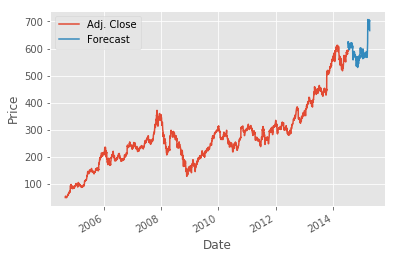

In [17]:
#style.use('ggplot')
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


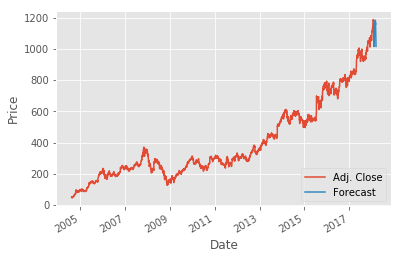

In [20]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


